C:\Users\69654\AppData\Local\Continuum\Anaconda2\lib\site-packages\skimage\filters\_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
C:\Users\69654\AppData\Local\Continuum\Anaconda2\lib\site-packages\skimage\filters\_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
C:\Users\69654\AppData\Local\Continuum\Anaconda2\lib\site-packages\skimage\filters\_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
C:\Users\69654\AppData\Local\Continuum\Anaconda2\lib\site-packages\skimage\filters\_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead

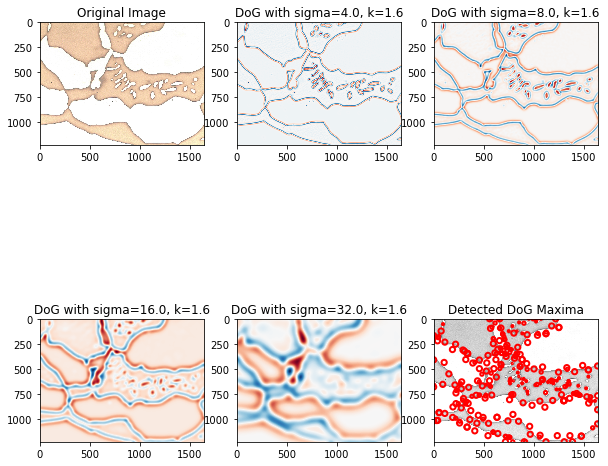

In [2]:
from skimage import data, feature, color, filters, img_as_float
from matplotlib import pyplot as plt
import numpy
import scipy
from scipy import ndimage
original_image = scipy.misc.imread('C:/test/0.jpg')
img = color.rgb2gray(original_image)

k = 1.6
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(original_image)
plt.title('Original Image')

for idx,sigma in enumerate([4.0,8.0,16.0,32.0]):
	s1 = filters.gaussian_filter(img,k*sigma)
	s2 = filters.gaussian_filter(img,sigma)

	# multiply by sigma to get scale invariance
	dog = s1 - s2
	plt.subplot(2,3,idx+2)
	#print dog.min(),dog.max()
	plt.imshow(dog,cmap='RdBu')
	plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))

ax = plt.subplot(2,3,6)
blobs_dog = [(x[0],x[1],x[2]) for x in feature.blob_dog(img, min_sigma=4, max_sigma=32,threshold=0.5,overlap=1.0)]
# skimage has a bug in my version where only maxima were returned by the above
blobs_dog += [(x[0],x[1],x[2]) for x in feature.blob_dog(-img, min_sigma=4, max_sigma=32,threshold=0.5,overlap=1.0)]

#remove duplicates
blobs_dog = set(blobs_dog)

img_blobs = color.gray2rgb(img)
for blob in blobs_dog:
	y, x, r = blob
	c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
	ax.add_patch(c)
plt.imshow(img_blobs)
plt.title('Detected DoG Maxima')

plt.show()